## Section 0: Ong Song Yi

## Section 1: Interview Exercise

## Section 2: Project Definition

### Goals:
In this project, I am attempting to detect High Risk Customers vs Low Risk Customers

### Dataset:
My datasets are from data sources, 

namely Customer Data and Payment Data.

### Tasks:

1) Data cleaning.
<br>
<br>
3) Data normalization (Stemming & Lemmatization)
<br>
<br>
3) Building a Machine Learning model

In [34]:
import pandas as pd
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

In [35]:
payment_data = pd.read_csv('Data\payment_data_ratio20.csv')
customer_data = pd.read_csv('Data\customer_data_ratio20.csv')

In [36]:
payment_data

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [37]:
customer_data

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [38]:
df = customer_data.merge(payment_data, how='inner', on='id')
df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015


In [39]:
df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2              1028
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [40]:
df = df.dropna(axis=0,subset=['update_date'])
df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
2,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,1,5,NaN,30/03/2009,0.0,150500.0,NaN
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8246,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,1,10,NaN,27/04/2008,-121.2,601.0,NaN
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015


In [41]:
df.isnull().sum()

label                 0
id                    0
fea_1                 0
fea_2              1025
fea_3                 0
fea_4                 0
fea_5                 0
fea_6                 0
fea_7                 0
fea_8                 0
fea_9                 0
fea_10                0
fea_11                0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6093
update_date           0
new_balance           0
highest_balance     395
report_date        1090
dtype: int64

In [42]:
df['highest_balance']

0         18934.0
1        149387.0
2        150500.0
3         46371.0
4         21500.0
          ...    
8245      35500.0
8246        601.0
8247    2400500.0
8248     406938.0
8249      36149.0
Name: highest_balance, Length: 8224, dtype: float64

In [43]:
df['report_date']

0       19/09/2015
1       10/08/2015
2              NaN
3       12/07/2013
4       19/04/2016
           ...    
8245    06/03/2011
8246           NaN
8247    12/01/2015
8248    22/12/2015
8249    16/01/2016
Name: report_date, Length: 8224, dtype: object

In [44]:
df['report_date'].isnull().sum() / len(df)

0.13253891050583658

In [45]:
df = df.dropna(axis=0,subset=['report_date'])
df

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,0,0,0,18,10,NaN,28/04/2009,153792.0,149387.0,10/08/2015
3,1,54982665,5,1245.5,3,77000.0,2,15,5,109,...,2,26,11906,6,10,NaN,17/05/2007,0.0,46371.0,12/07/2013
4,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,4,6,NaN,02/06/2016,15120.0,21500.0,19/04/2016
5,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,...,0,0,0,5,6,NaN,17/12/2015,5596.8,14500.0,19/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,34,5,NaN,19/03/2011,0.0,250500.0,04/07/2015
8245,0,58998054,4,1250.0,3,137000.0,2,8,5,90,...,0,0,0,10,13,NaN,06/04/2010,0.0,35500.0,06/03/2011
8247,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,12,2,NaN,01/12/2015,334130.4,2400500.0,12/01/2015
8248,0,54989781,4,1415.0,3,93000.0,2,8,5,113,...,0,0,0,7,1,NaN,18/07/2015,456098.4,406938.0,22/12/2015


In [46]:
df = df.fillna(0)
df = df.drop('id', axis=1)
df

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,9,10,60500.0,31/01/2015,6657.6,18934.0,19/09/2015
1,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,18,10,0.0,28/04/2009,153792.0,149387.0,10/08/2015
3,1,5,1245.5,3,77000.0,2,15,5,109,5,...,2,26,11906,6,10,0.0,17/05/2007,0.0,46371.0,12/07/2013
4,0,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,4,6,0.0,02/06/2016,15120.0,21500.0,19/04/2016
5,0,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,5,6,0.0,17/12/2015,5596.8,14500.0,19/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,34,5,0.0,19/03/2011,0.0,250500.0,04/07/2015
8245,0,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,10,13,0.0,06/04/2010,0.0,35500.0,06/03/2011
8247,0,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,12,2,0.0,01/12/2015,334130.4,2400500.0,12/01/2015
8248,0,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,7,1,0.0,18/07/2015,456098.4,406938.0,22/12/2015


In [47]:
df.isnull().sum()

label              0
fea_1              0
fea_2              0
fea_3              0
fea_4              0
fea_5              0
fea_6              0
fea_7              0
fea_8              0
fea_9              0
fea_10             0
fea_11             0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
update_date        0
new_balance        0
highest_balance    0
report_date        0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7134 entries, 0 to 8249
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            7134 non-null   int64  
 1   fea_1            7134 non-null   int64  
 2   fea_2            7134 non-null   float64
 3   fea_3            7134 non-null   int64  
 4   fea_4            7134 non-null   float64
 5   fea_5            7134 non-null   int64  
 6   fea_6            7134 non-null   int64  
 7   fea_7            7134 non-null   int64  
 8   fea_8            7134 non-null   int64  
 9   fea_9            7134 non-null   int64  
 10  fea_10           7134 non-null   int64  
 11  fea_11           7134 non-null   float64
 12  OVD_t1           7134 non-null   int64  
 13  OVD_t2           7134 non-null   int64  
 14  OVD_t3           7134 non-null   int64  
 15  OVD_sum          7134 non-null   int64  
 16  pay_normal       7134 non-null   int64  
 17  prod_code     

In [49]:
object_columns = [i for i in df.columns if df[i].dtypes == 'O']
df[object_columns]

,update_date,report_date
0,31/01/2015,19/09/2015
1,28/04/2009,10/08/2015
3,17/05/2007,12/07/2013
4,02/06/2016,19/04/2016
5,17/12/2015,19/04/2016
...,...,...
8244,19/03/2011,04/07/2015
8245,06/04/2010,06/03/2011
8247,01/12/2015,12/01/2015
8248,18/07/2015,22/12/2015


In [50]:
df['update_date'] = pd.to_datetime(df['update_date'])
df['report_date'] = pd.to_datetime(df['report_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7134 entries, 0 to 8249
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   label            7134 non-null   int64         
 1   fea_1            7134 non-null   int64         
 2   fea_2            7134 non-null   float64       
 3   fea_3            7134 non-null   int64         
 4   fea_4            7134 non-null   float64       
 5   fea_5            7134 non-null   int64         
 6   fea_6            7134 non-null   int64         
 7   fea_7            7134 non-null   int64         
 8   fea_8            7134 non-null   int64         
 9   fea_9            7134 non-null   int64         
 10  fea_10           7134 non-null   int64         
 11  fea_11           7134 non-null   float64       
 12  OVD_t1           7134 non-null   int64         
 13  OVD_t2           7134 non-null   int64         
 14  OVD_t3           7134 non-null   int64  

In [51]:
df['update_date'] = df['update_date'] - df['update_date'].min()
df['report_date'] = df['report_date'] - df['report_date'].min()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7134 entries, 0 to 8249
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   label            7134 non-null   int64          
 1   fea_1            7134 non-null   int64          
 2   fea_2            7134 non-null   float64        
 3   fea_3            7134 non-null   int64          
 4   fea_4            7134 non-null   float64        
 5   fea_5            7134 non-null   int64          
 6   fea_6            7134 non-null   int64          
 7   fea_7            7134 non-null   int64          
 8   fea_8            7134 non-null   int64          
 9   fea_9            7134 non-null   int64          
 10  fea_10           7134 non-null   int64          
 11  fea_11           7134 non-null   float64        
 12  OVD_t1           7134 non-null   int64          
 13  OVD_t2           7134 non-null   int64          
 14  OVD_t3           7134 no

In [53]:
df['update_date'] = pd.to_numeric(df['update_date'])
df['report_date'] = pd.to_numeric(df['report_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7134 entries, 0 to 8249
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            7134 non-null   int64  
 1   fea_1            7134 non-null   int64  
 2   fea_2            7134 non-null   float64
 3   fea_3            7134 non-null   int64  
 4   fea_4            7134 non-null   float64
 5   fea_5            7134 non-null   int64  
 6   fea_6            7134 non-null   int64  
 7   fea_7            7134 non-null   int64  
 8   fea_8            7134 non-null   int64  
 9   fea_9            7134 non-null   int64  
 10  fea_10           7134 non-null   int64  
 11  fea_11           7134 non-null   float64
 12  OVD_t1           7134 non-null   int64  
 13  OVD_t2           7134 non-null   int64  
 14  OVD_t3           7134 non-null   int64  
 15  OVD_sum          7134 non-null   int64  
 16  pay_normal       7134 non-null   int64  
 17  prod_code     

In [54]:
df

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,...,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,9,10,60500.0,837388800000000000,6657.6,18934.0,617500800000000000
1,1,5,1245.5,3,77000.0,2,15,5,109,5,...,0,0,0,18,10,0.0,655603200000000000,153792.0,149387.0,619142400000000000
3,1,5,1245.5,3,77000.0,2,15,5,109,5,...,2,26,11906,6,10,0.0,594086400000000000,0.0,46371.0,561254400000000000
4,0,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,4,6,0.0,869443200000000000,15120.0,21500.0,635904000000000000
5,0,4,1277.0,1,113000.0,2,8,-1,100,3,...,0,0,0,5,6,0.0,865036800000000000,5596.8,14500.0,635904000000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,0,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,34,5,0.0,715219200000000000,0.0,250500.0,603244800000000000
8245,0,4,1250.0,3,137000.0,2,8,5,90,5,...,0,0,0,10,13,0.0,690336000000000000,0.0,35500.0,481939200000000000
8247,0,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,12,2,0.0,835747200000000000,334130.4,2400500.0,623808000000000000
8248,0,4,1415.0,3,93000.0,2,8,5,113,4,...,0,0,0,7,1,0.0,851904000000000000,456098.4,406938.0,625622400000000000


In [55]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101, stratify=y)

In [56]:
lg = LogisticRegressionCV()
params_lg = {
    'Cs':[1,10,100,1000],
    'penalty':['l1', 'l2', 'elasticnet'],
}
gs = GridSearchCV(lg, params_lg, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

C:\Users\Song Yi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.83256593        nan        nan 0.83256593        nan
        nan 0.83256593        nan        nan 0.83256593        nan]
  warnings.warn(
C:\Users\Song Yi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Song Yi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of ite

{'Cs': 1, 'penalty': 'l2'}

In [57]:
gs.score(X_train, y_train)

0.8325655918285599

In [58]:
gs.score(X_test, y_test)

0.8323213451658104

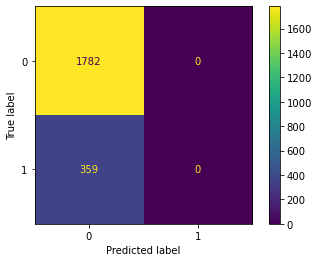

In [59]:
plot_confusion_matrix(gs, X_test, y_test);

In [60]:
print(classification_report(y_test, gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1782
           1       0.00      0.00      0.00       359

    accuracy                           0.83      2141
   macro avg       0.42      0.50      0.45      2141
weighted avg       0.69      0.83      0.76      2141



C:\Users\Song Yi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Song Yi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Song Yi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
rf = RandomForestClassifier()
params_rf = {
    'max_depth':[50,100,150,200],
    'max_features':[10,15,20],
    'min_samples_leaf':[30,40,50],
    'min_samples_split':[30,40,50]
}
gs = GridSearchCV(rf, params_rf, cv=10, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_

{'max_depth': 150,
 'max_features': 20,
 'min_samples_leaf': 30,
 'min_samples_split': 30}

In [62]:
gs.score(X_train, y_train)

0.8696174644502304

In [63]:
gs.score(X_test, y_test)

0.864549276039234

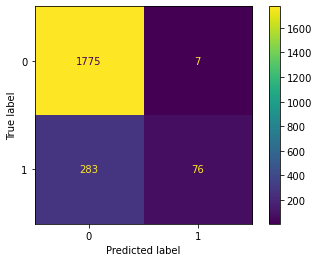

In [64]:
plot_confusion_matrix(gs, X_test, y_test);

In [65]:
print(classification_report(y_test, gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1782
           1       0.92      0.21      0.34       359

    accuracy                           0.86      2141
   macro avg       0.89      0.60      0.63      2141
weighted avg       0.87      0.86      0.83      2141

